---
<div class="alert alert-success" data-title="">
  <h2><i class="fa fa-tasks" aria-hidden="true"></i> 사이킷런을 사용한 당뇨병 혈당 예측
  </h2>
</div>

<img src = "https://res.cloudinary.com/grohealth/image/upload/$wpsize_!_cld_full!,w_1200,h_630,c_scale/v1588094388/How-to-Bring-Down-High-Blood-Sugar-Levels-1.png" width = "700" >


이번 실습 시간에 다뤄볼 데이터는 당뇨병 관련 데이터 입니다.

- 당뇨병에 영향을 끼치는 여러 요소들 (X, Features)
- 혈당 (Y, Target)


## 데이터 살펴보기 (EDA)

### 데이터 불러오기

In [1]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [2]:
import pandas as pd
diabetes_df = pd.DataFrame(diabetes.data, 
                         columns=diabetes.feature_names, 
                         index=range(1,len(diabetes.data)+1))
diabetes_df['Target'] = diabetes.target
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
1,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
2,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
3,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
4,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
5,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


### 각각의 독립변수와 종속변수 사이의 관계를 살펴본다. 

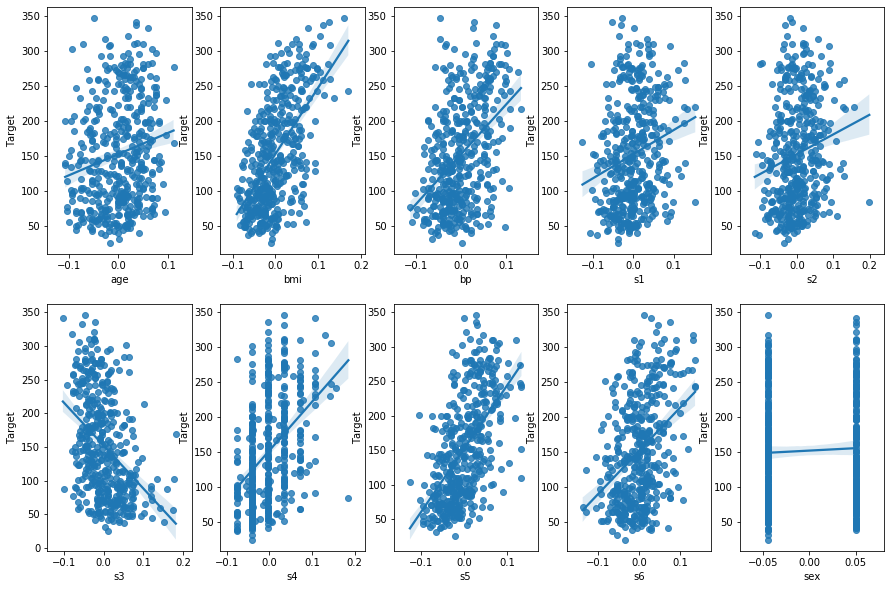

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns



### 히트맵으로 상관관계 나타내기

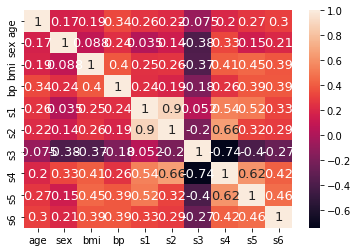

In [10]:
# 변수들 간의 상관 계수를 구한다
ccol = ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
corrs = diabetes_df[ccol].corr()

# 상관 계수 값에 대한 히트맵을 그린다
# 매개변수 annot은 맵상에 값을 표시할 것인지의 여부를 지정한다
# 매개변수 annot_kws는 표시되는 값에 대한 추가 옵션이다.
sns.heatmap(corrs,annot=True,annot_kws={'size':13})

<div class="alert alert-success" data-title="">
  <h2><i class="fa fa-tasks" aria-hidden="true"></i> 실제 데이터로 다중선형회귀 해보기
  </h2>
</div>

In [11]:
# 데이터 프레임에서 독립변수와 종속변수를 다시 구분



## 학습 평가 데이터 나누기 


```python 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
        train_test_split(X,y , test_size, train_size, random_state, shuffle, stratify)
```

- X, y : 분할시킬 데이터
- test_size : 테스트 데이터셋의 비율(float)이나 갯수(int) (default = 0.25)
- train_size : 학습 데이터셋의 비율(float)이나 갯수(int) (default = test_size의 나머지)
- shuffle : 셔플여부설정 (default = True)
- stratify : 지정한 Data의 비율을 유지 ex) Label Set인 Y가 25%의 0과 75%의 1로 이루어진 Binary -Set일 때, stratify=Y로 설정하면 나누어진 데이터셋들도 0과 1을 각각 25%, 75%로 유지한 채 분할된다.




### random_state 에 대하여

- random_state : 데이터 분할시 셔플이 이루어지는데 이를 기억하기 위한 임의의 시드값 (int나 RandomState로 입력)
> 컴퓨터에서 random한 결과를 낼 시, 'Seed'라 부르는 특정한 시작으로 숫자를 지정합니다. 즉, 컴퓨터에서 random은 실제로 random이 아닙니다.

`random_sate`은 **학습데이터 평가데이터 분리할 때** 사용되며, 데이터셋을 무작위로 섞어서 분리하기 때문에 **시드값**이 필요합니다.

Ex) `random_state` = 1이라고 정의하는 경우, 시드값을 1로하는 무작위로 복원 추출된 데이터의 학습 결과와 그에 따라 결정된 변수들을 담아둡니다.

In [13]:
# 학습용 및 검증용 데이터로 분리한다
from sklearn.model_selection import train_test_split


In [14]:
from sklearn.linear_model import LinearRegression



## 평가 

### 평가지표 
- MAE(Mean Absolute Error): 실제 값과 예측값의 차이를 절대값으로 변환해 평균한 것.
- MSE(Mean Squared Error): 실제 값과 예측값의 차이를 제곱해 평균한 것.
- RMSE(Root Mean Squared Error): MSE에 루트를 씌워 값이 지나치게 커지는 것을 하고, 단위를 맞춰주는 것을 목표로 함.
- 이외에도.. MSLE, RMSLE 등의 평가지표가 많습니다.

In [17]:
from sklearn.metrics import mean_squared_error, r2_score    # 사이킷런에 있는 평가 지표 함수들


MSE : 2821.739 , RMSE : 53.120
Variance score : 0.477


## CV 사용하기 
```python 
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import StratifiedKFold

from sklearn.model_selection import cross_val_score

```

In [18]:
from sklearn.model_selection import KFold


In [25]:
from sklearn.model_selection import cross_val_score


array([0.55614411, 0.23056092, 0.35357777, 0.62190498, 0.26587602,
       0.61819338, 0.41815916, 0.43515232, 0.43436983, 0.68568514])